In [1]:
from scipy import sparse
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import psycopg2
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans

In [16]:
conn = psycopg2.connect("dbname='cap' user='postgres' host='ec2-52-27-114-159.us-west-2.compute.amazonaws.com' port=9000 password ='secret'")
data = pd.read_sql_query("SELECT * FROM nlp_dim ORDER BY id DESC LIMIT 300", conn)

,index,site,title,author,published_on,accessed_on,url,body,newspaper_keywords,newspaper_summary,id,tokenized_body,word_count,stopworded_body,lemmatized_body,word_bag,named_entities,lexical_diversity,sentiment_score,binary_sentiment
0,99,The Next Web,Fundamental growth hacking for new ‘solopreneurs’,Sam Hurley,2017-04-22,2017-04-22 12:50:37.109089,https://thenextweb.com/marketing-seo/2017/04/2...,Successful digital marketing and website optim...,"{solopreneurs,know,thats,social,content,right,...",Growth hacking is a turbo-charged form of mark...,27372,"[u'Successful', u'digital', u'marketing', u'an...",1396,"[u'successful', u'digital', u'marketing', u'we...","[u'successful', u'digital', u'marketing', u'we...","[(u'content', 19), (u'you', 13), (u'need', 12)...","[(u'Google', u'ORGANIZATION'), (u'Google', u'O...",63.255240,"{'neg': 0.04236708860759494, 'neu': 0.81048101...",1
1,817,GoogleNews,We All Need More of What Moto and the Snapdrag...,Oscar García,2017-04-13,2017-04-16 09:32:07.044448,http://www.droid-life.com/2017/04/13/need-moto...,If you are in the market for a new phone and w...,"{snapdragon,cookin,phone,battery,need,life,z,p...",I’ve talked about my love for the Moto Z Play ...,19299,"[u'If', u'you', u'are', u'in', u'the', u'marke...",798,"[u'if', u'market', u'new', u'phone', u'want', ...","[u'if', u'market', u'new', u'phone', u'want', ...","[(u'phone', 21), (u'625', 8), (u'battery', 7),...","[(u'Motorola', u'ORGANIZATION'), (u'Motorola',...",63.294118,"{'neg': 0.03620588235294118, 'neu': 0.87673529...",1
2,990,GoogleNews,Google News,None,None,2017-04-15 09:17:51.999701,https://news.google.com/news/rtc?ncl=d9ziIwJl0...,From tweets to the streets: Nationwide anti-Tr...,"{white,antitrump,day,tweets,nationwide,tax,str...",The Atlantic Subscribe to The Atlantic's Polit...,17572,"[u'From', u'tweets', u'to', u'the', u'streets'...",238,"[u'from', u'tweets', u'streets', u':', u'natio...","[u'from', u'tweet', u'street', u':', u'nationw...","[(u'tax', 6), (u'protest', 5), (u'march', 5), ...","[(u'CNN', u'ORGANIZATION'), (u'CNN', u'ORGANIZ...",70.779221,"{'neg': 0.096625, 'neu': 0.86825, 'pos': 0.035...",0
3,725,Tech Cruch,"SpotCam connects you to your home, outside and in",John Biggs,2017-04-13,2017-04-14 13:04:40.832326,https://techcrunch.com/2017/04/13/spotcam-conn...,When it comes to home surveillance cams there ...,"{app,model,quite,youre,youll,spotcam,set,outsi...",SpotCam seems to land squarely in the middle w...,17309,"[u'When', u'it', u'comes', u'to', u'home', u's...",547,"[u'when', u'comes', u'home', u'surveillance', ...","[u'when', u'come', u'home', u'surveillance', u...","[(u'home', 5), (u'spotcam', 4), (u'set', 4), (...","[(u'Dropcam', u'PERSON')]",73.448276,"{'neg': 0.02, 'neu': 0.7853600000000001, 'pos'...",1
4,538,The Verge,Nintendo doesn’t want your money — it wants yo...,Apr,2017-04-13,2017-04-14 12:49:38.520662,http://www.theverge.com/2017/4/13/15294494/nin...,Nintendo’s announcement today that it’s discon...,"{sell,money,soul,doesnt,products,product,ninte...","How, after so many product mishaps and sleeper...",17215,"[u'Nintendo\u2019s', u'announcement', u'today'...",998,"[u'nintendo\u2019s', u'announcement', u'today'...","[u'nintendo\u2019s', u'announcement', u'today'...","[(u'nintendo', 18), (u'company', 11), (u'it\u2...","[(u'Nintendo', u'ORGANIZATION'), (u'Nintendo',...",66.994106,"{'neg': 0.06741666666666664, 'neu': 0.84256250...",1


In [4]:
x = sparse.load_npz('model/tf_idf.npz')

In [5]:
x

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 3667 stored elements in Compressed Sparse Row format>

In [6]:
# First we are going to PCA this vector data 
reduced_data = PCA(n_components=2).fit_transform(x.todense())

km = KMeans(init='k-means++', n_clusters=3, n_init=10)
km.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
reduced_data.shape

(100, 2)

In [8]:
# step size of mesh
h = 0.1

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [9]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [10]:
xx.shape

(33, 35)

In [11]:
yy.shape

(33, 35)

In [12]:
test_data = np.c_[xx.ravel(), yy.ravel()]
# test_data.shape
Z = km.predict(test_data)
Z.shape

(1155,)

In [13]:
Z = Z.reshape(xx.shape)
Z.shape

(33, 35)

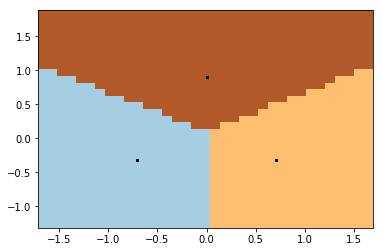

In [18]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.show()

In [19]:
reduced_data

array([[  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  7.07106781e-01,  -3.18433667e-01],
       [  